In [1]:
import pandas as pd

# 读取数据集
train_data = pd.read_csv('Loan_defaults_training.csv')

# 查看数据集的基本信息
train_data_info = train_data.info()

# 描述性统计量
train_data_describe = train_data.describe()

# 缺失值分析
missing_values = train_data.isnull().sum()

# 类别变量频数分布
categorical_columns = ['term', 'grade', 'subGrade', 'homeOwnership', 'purpose', 'regionCode', 
                       'initialListStatus', 'applicationType', 'isDefault']
categorical_frequencies = {col: train_data[col].value_counts() for col in categorical_columns}

train_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  100000 non-null  int64  
 1   loanAmnt            100000 non-null  int64  
 2   term                100000 non-null  int64  
 3   interestRate        100000 non-null  float64
 4   installment         100000 non-null  float64
 5   grade               100000 non-null  object 
 6   subGrade            100000 non-null  object 
 7   employmentTitle     100000 non-null  int64  
 8   homeOwnership       100000 non-null  int64  
 9   annualIncome        100000 non-null  float64
 10  purpose             100000 non-null  int64  
 11  postCode            100000 non-null  int64  
 12  regionCode          100000 non-null  int64  
 13  dti                 99983 non-null   float64
 14  delinquency_2years  100000 non-null  int64  
 15  openAcc             100000 non-null

# 数据预处理

In [4]:
train_data_describe

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,purpose,postCode,...,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,isDefault
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,100000.000000,100000.00000,...,100000.000000,100000.000000,99952.000000,100000.000000,99935.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,49999.500000,14410.685500,3.486960,13.261986,437.555229,72091.46859,0.617900,7.585639e+04,1.748630,258.39200,...,11.606460,0.213540,0.134074,16208.742210,51.843124,24.970240,0.415900,0.01871,1740.933680,0.201660
std,28867.657797,8714.184585,0.858369,4.780213,261.286364,106639.76425,0.678826,7.615790e+04,2.370911,200.06269,...,5.500383,0.601352,0.376925,21757.957914,24.472080,12.025843,0.492879,0.13550,7897.184729,0.401242
min,0.000000,750.000000,3.000000,5.310000,22.590000,0.00000,0.000000,0.000000e+00,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000
25%,24999.750000,8000.000000,3.000000,9.750000,248.810000,427.00000,0.000000,4.520000e+04,0.000000,102.00000,...,8.000000,0.000000,0.000000,5961.000000,33.500000,16.000000,0.000000,0.00000,0.000000,0.000000
50%,49999.500000,12000.000000,3.000000,12.740000,374.330000,7941.00000,1.000000,6.500000e+04,0.000000,203.00000,...,11.000000,0.000000,0.000000,11161.500000,52.200000,23.000000,0.000000,0.00000,2.000000,0.000000
75%,74999.250000,20000.000000,3.000000,15.990000,578.620000,117662.50000,1.000000,9.000000e+04,4.000000,395.00000,...,14.000000,0.000000,0.000000,19795.000000,70.800000,32.000000,1.000000,0.00000,5.000000,0.000000
max,99999.000000,40000.000000,5.000000,30.990000,1647.030000,378347.00000,5.000000,1.099920e+07,13.000000,940.00000,...,81.000000,49.000000,7.000000,898146.000000,177.700000,141.000000,1.000000,1.00000,61677.000000,1.000000


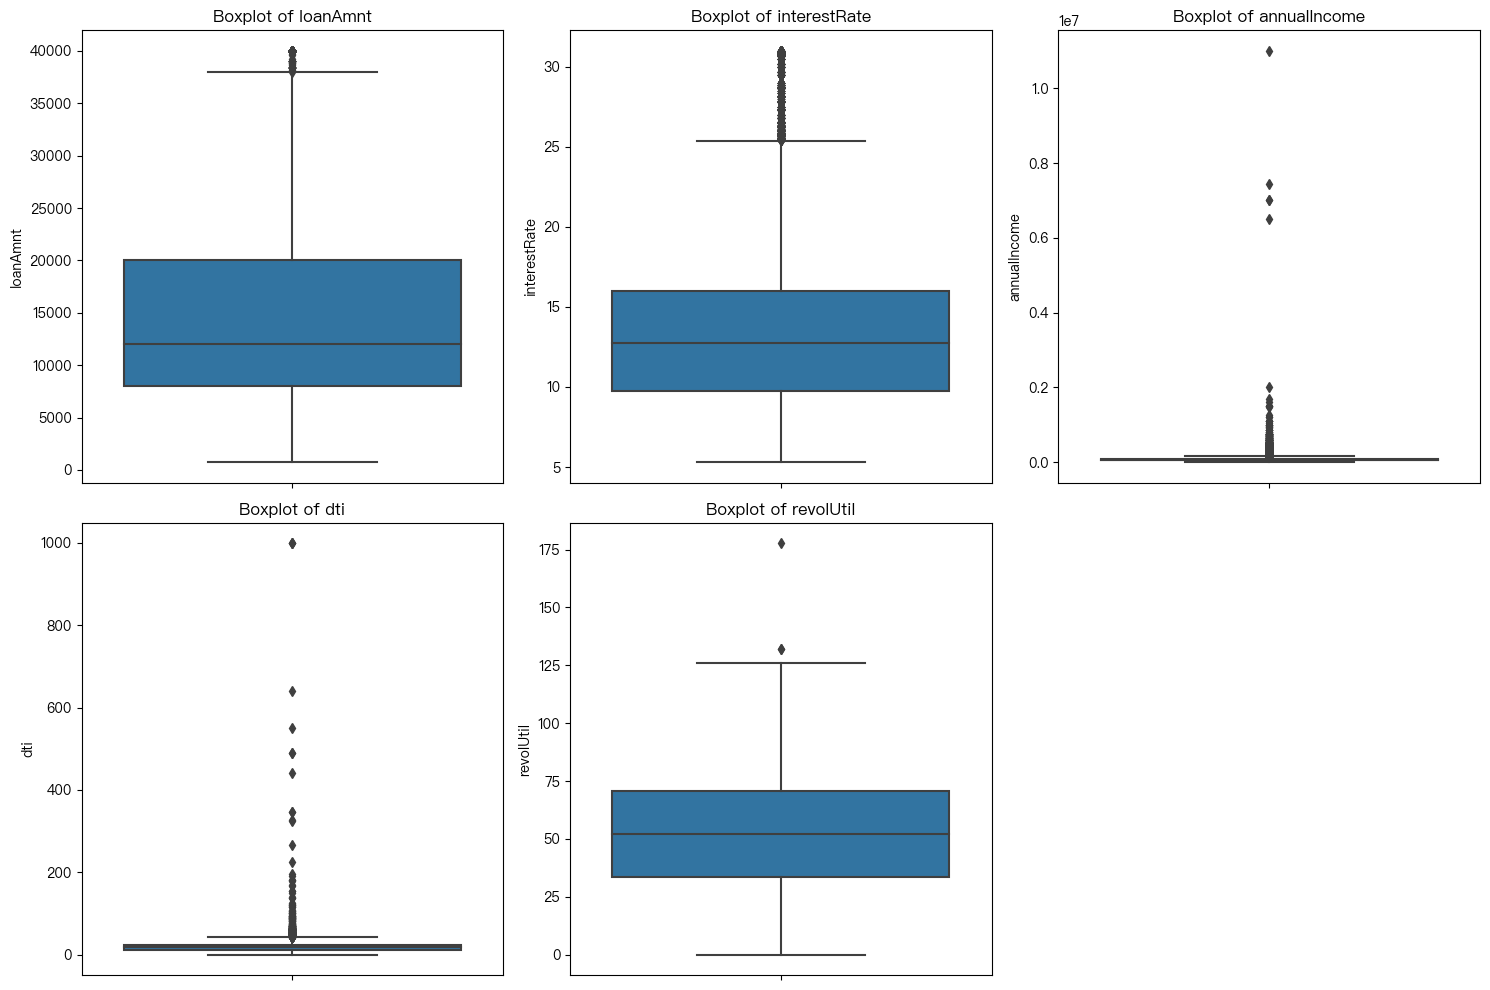

In [5]:
# 使用箱线图检测异常值
import matplotlib.pyplot as plt
import seaborn as sns
# 设置中文字体和负号显示
plt.rcParams['font.sans-serif'] = ['PingFang HK']    # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
numerical_columns = ['loanAmnt', 'interestRate', 'annualIncome', 'dti', 'revolUtil']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=train_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('fig0.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
missing_values

id                     0
loanAmnt               0
term                   0
interestRate           0
installment            0
grade                  0
subGrade               0
employmentTitle        0
homeOwnership          0
annualIncome           0
purpose                0
postCode               0
regionCode             0
dti                   17
delinquency_2years     0
openAcc                0
pubRec                 0
pubRecBankruptcies    48
revolBal               0
revolUtil             65
totalAcc               0
initialListStatus      0
applicationType        0
title                  0
isDefault              0
dtype: int64

In [7]:
categorical_frequencies

{'term': 3    75652
 5    24348
 Name: term, dtype: int64,
 'grade': B    29261
 C    28380
 A    17293
 D    14977
 E     6954
 F     2437
 G      698
 Name: grade, dtype: int64,
 'subGrade': C1    6364
 B4    6251
 B5    6226
 B3    6072
 C2    5922
 C4    5562
 C3    5538
 B2    5497
 B1    5215
 C5    4994
 A5    4686
 D1    3815
 A4    3735
 D2    3282
 A1    3198
 D3    2959
 A2    2847
 A3    2827
 D4    2703
 D5    2218
 E1    1768
 E2    1567
 E3    1334
 E4    1216
 E5    1069
 F1     765
 F2     561
 F3     436
 F4     369
 F5     306
 G1     238
 G2     156
 G3     128
 G4      98
 G5      78
 Name: subGrade, dtype: int64,
 'homeOwnership': 0    49307
 1    39681
 2    10965
 3       24
 5       15
 4        8
 Name: homeOwnership, dtype: int64,
 'purpose': 0     58000
 4     22002
 2      6516
 5      5700
 3      2228
 9      1133
 1      1093
 8      1070
 10      750
 7       700
 6       542
 12      169
 11       76
 13       21
 Name: purpose, dtype: int64,
 'regionC

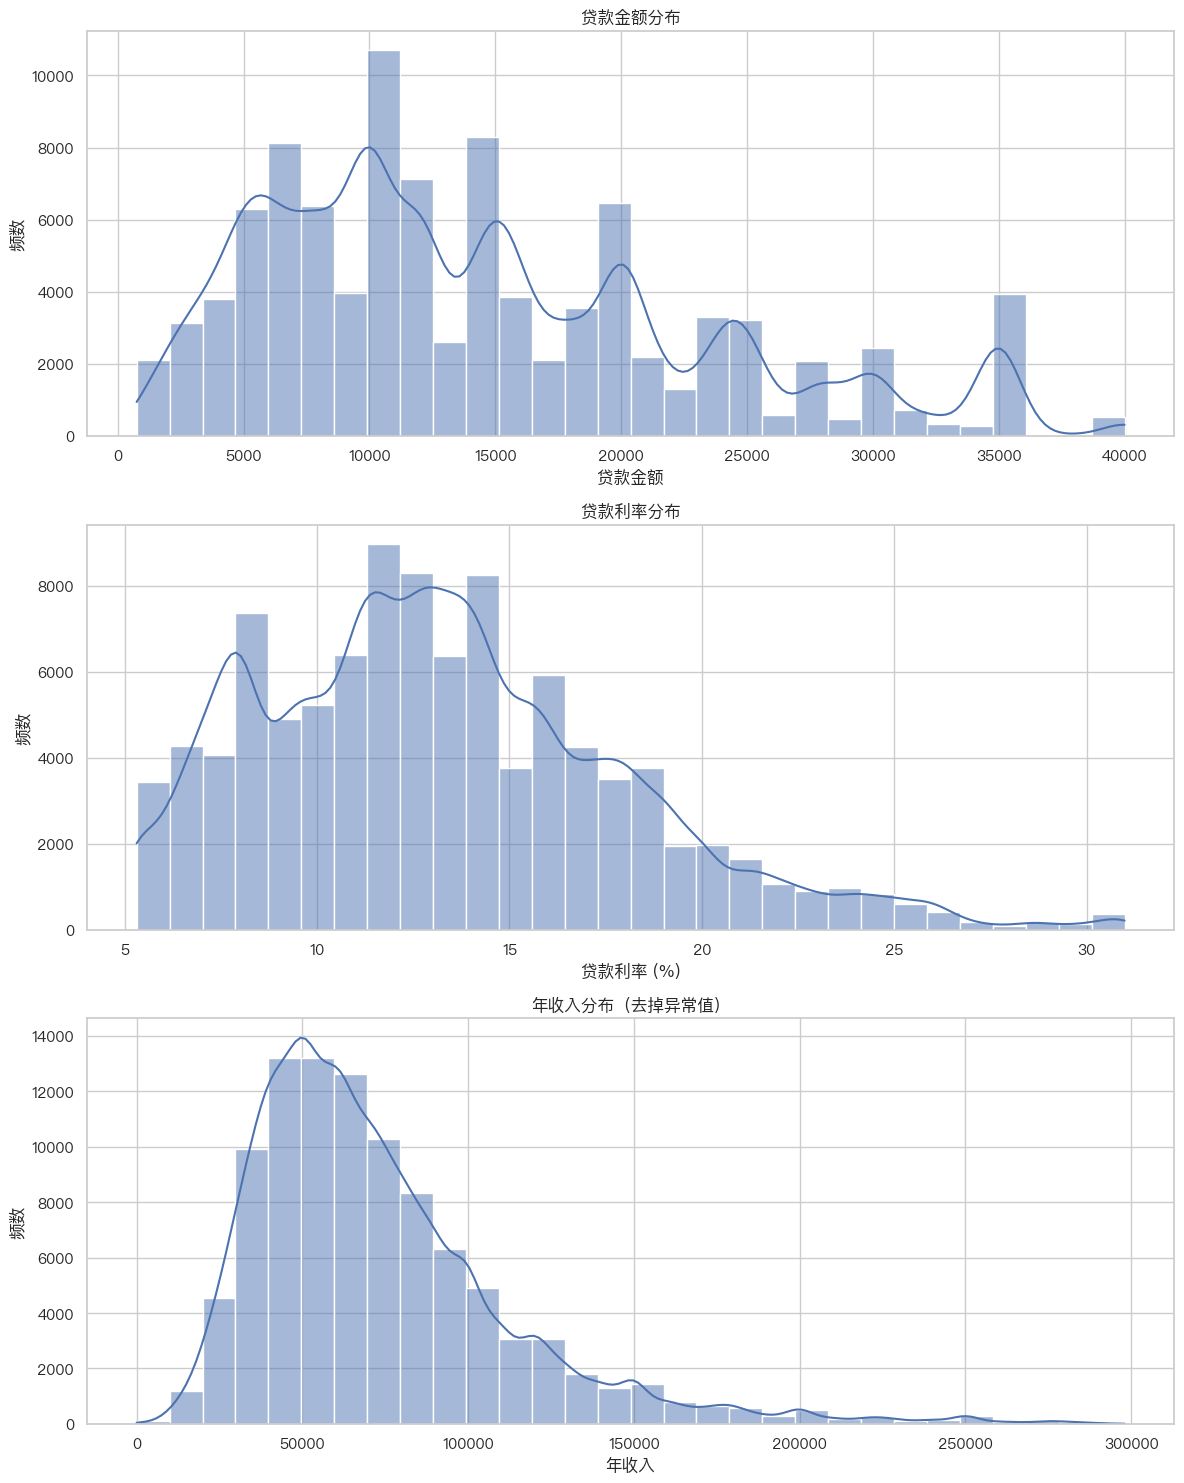

In [8]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# 设置Seaborn样式
sns.set(style="whitegrid")

# 描述性统计表
desc_stats_table = train_data.describe().T

# 绘制数值型变量的分布图
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# 贷款金额分布
sns.histplot(train_data['loanAmnt'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('贷款金额分布')
axes[0].set_xlabel('贷款金额')
axes[0].set_ylabel('频数')

# 利率分布
sns.histplot(train_data['interestRate'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('贷款利率分布')
axes[1].set_xlabel('贷款利率 (%)')
axes[1].set_ylabel('频数')

# 年收入分布（去掉异常值）
sns.histplot(train_data[train_data['annualIncome'] < 300000]['annualIncome'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('年收入分布（去掉异常值）')
axes[2].set_xlabel('年收入')
axes[2].set_ylabel('频数')


# 设置中文字体和负号显示
plt.rcParams['font.sans-serif'] = ['PingFang HK']    # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
plt.tight_layout()
plt.savefig('fig1.png', dpi=300)
plt.show()



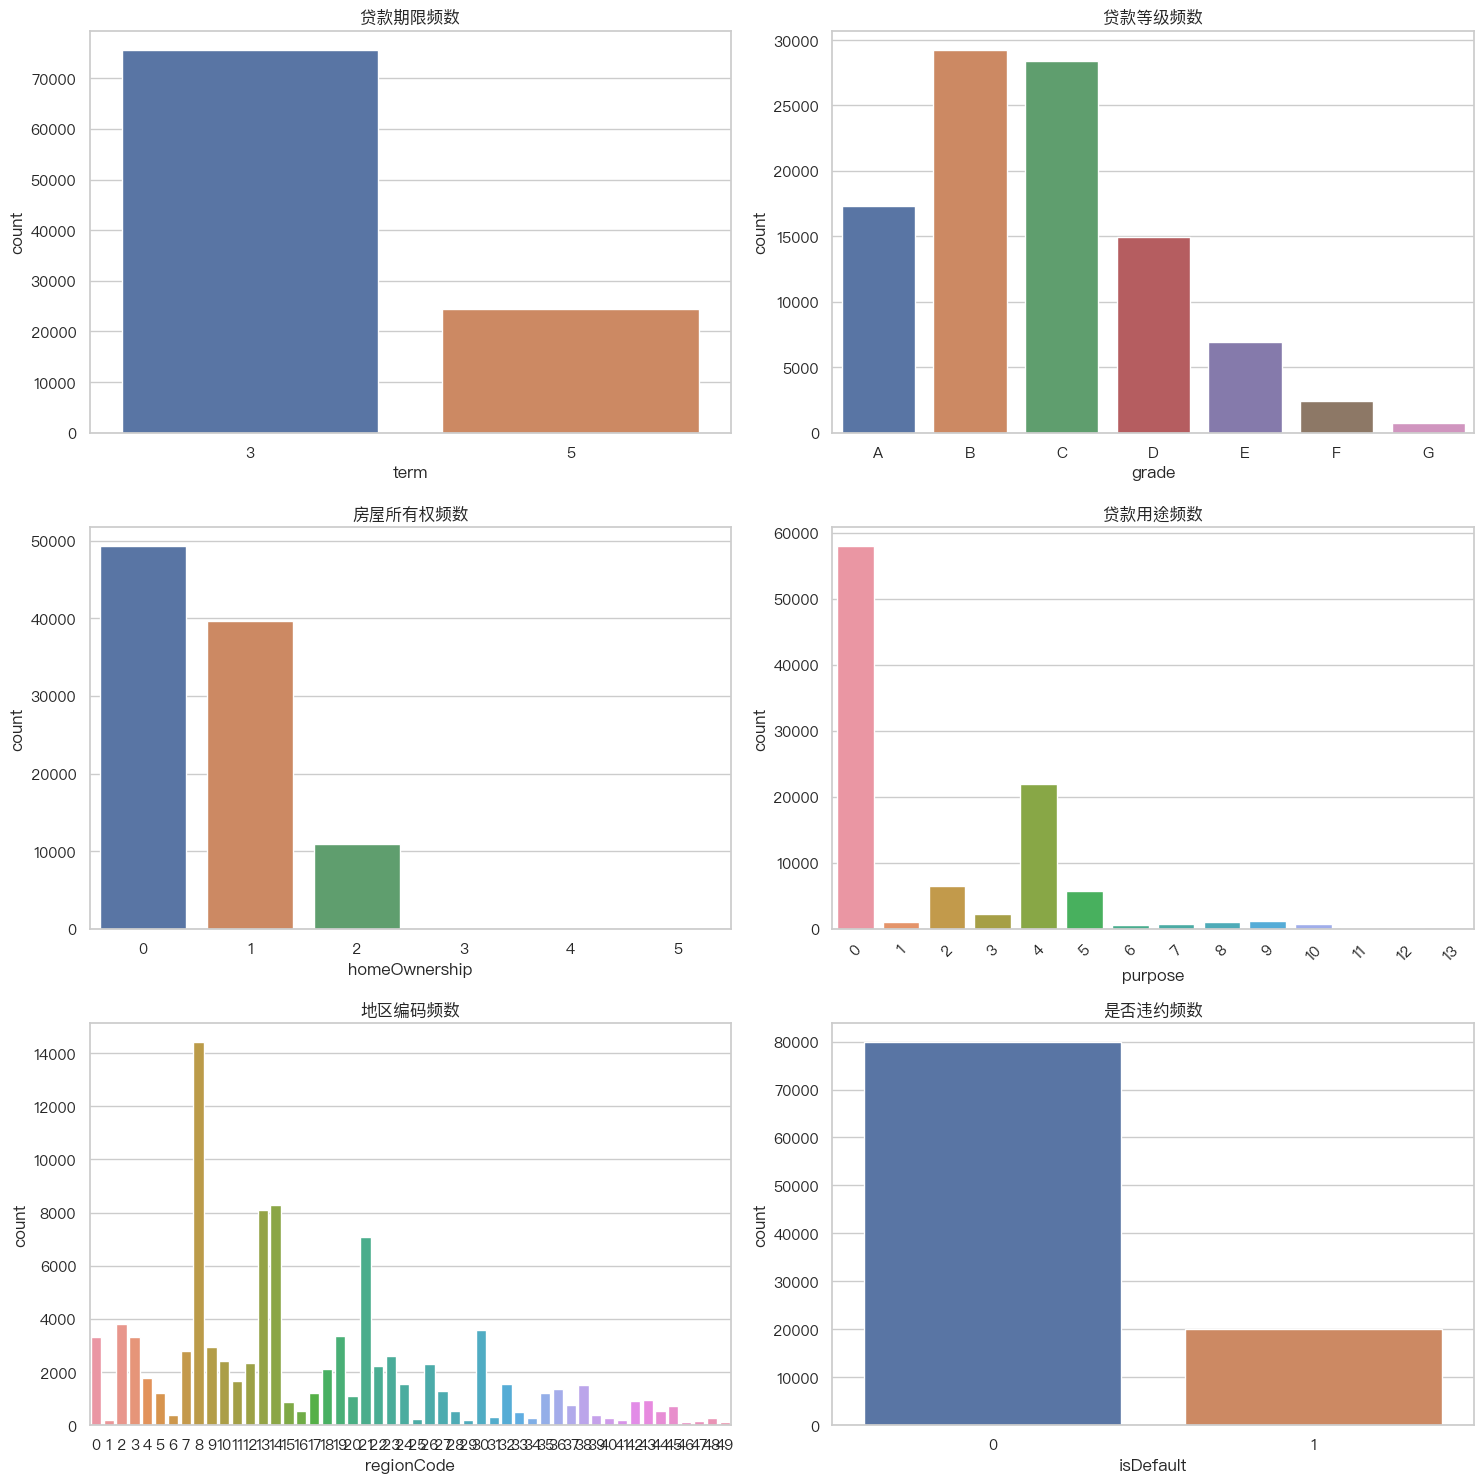

In [9]:
# 绘制类别变量的频数图
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# 贷款期限频数
sns.countplot(data=train_data, x='term', ax=axes[0, 0])
axes[0, 0].set_title('贷款期限频数')

# 贷款等级频数
sns.countplot(data=train_data, x='grade', order=sorted(train_data['grade'].unique()), ax=axes[0, 1])
axes[0, 1].set_title('贷款等级频数')

# 房屋所有权频数
sns.countplot(data=train_data, x='homeOwnership', ax=axes[1, 0])
axes[1, 0].set_title('房屋所有权频数')

# 借款用途频数
sns.countplot(data=train_data, x='purpose', ax=axes[1, 1])
axes[1, 1].set_title('贷款用途频数')
axes[1, 1].tick_params(axis='x', rotation=45)

# 地区编码频数
sns.countplot(data=train_data, x='regionCode', ax=axes[2, 0])
axes[2, 0].set_title('地区编码频数')

# 是否违约频数
sns.countplot(data=train_data, x='isDefault', ax=axes[2, 1])
axes[2, 1].set_title('是否违约频数')

# 设置中文字体和负号显示
plt.rcParams['font.sans-serif'] = ['PingFang HK']    # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
plt.tight_layout()
plt.savefig('fig2.png', dpi=300, bbox_inches='tight')
plt.show()


In [13]:
'''
# 处理缺失值：用中位数填补数值型缺失值
train_data['dti'].fillna(train_data['dti'].median(), inplace=True)
train_data['pubRecBankruptcies'].fillna(train_data['pubRecBankruptcies'].median(), inplace=True)
train_data['revolUtil'].fillna(train_data['revolUtil'].median(), inplace=True)
'''
train_data.dropna()


train_data.describe()


,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,purpose,postCode,...,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,isDefault
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,100000.000000,100000.00000,...,100000.000000,100000.000000,99952.000000,100000.000000,99935.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,49999.500000,14410.685500,3.486960,13.261986,437.555229,72091.46859,0.617900,7.585639e+04,1.748630,258.39200,...,11.606460,0.213540,0.134074,16208.742210,51.843124,24.970240,0.415900,0.01871,1740.933680,0.201660
std,28867.657797,8714.184585,0.858369,4.780213,261.286364,106639.76425,0.678826,7.615790e+04,2.370911,200.06269,...,5.500383,0.601352,0.376925,21757.957914,24.472080,12.025843,0.492879,0.13550,7897.184729,0.401242
min,0.000000,750.000000,3.000000,5.310000,22.590000,0.00000,0.000000,0.000000e+00,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000
25%,24999.750000,8000.000000,3.000000,9.750000,248.810000,427.00000,0.000000,4.520000e+04,0.000000,102.00000,...,8.000000,0.000000,0.000000,5961.000000,33.500000,16.000000,0.000000,0.00000,0.000000,0.000000
50%,49999.500000,12000.000000,3.000000,12.740000,374.330000,7941.00000,1.000000,6.500000e+04,0.000000,203.00000,...,11.000000,0.000000,0.000000,11161.500000,52.200000,23.000000,0.000000,0.00000,2.000000,0.000000
75%,74999.250000,20000.000000,3.000000,15.990000,578.620000,117662.50000,1.000000,9.000000e+04,4.000000,395.00000,...,14.000000,0.000000,0.000000,19795.000000,70.800000,32.000000,1.000000,0.00000,5.000000,0.000000
max,99999.000000,40000.000000,5.000000,30.990000,1647.030000,378347.00000,5.000000,1.099920e+07,13.000000,940.00000,...,81.000000,49.000000,7.000000,898146.000000,177.700000,141.000000,1.000000,1.00000,61677.000000,1.000000


In [14]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  100000 non-null  int64  
 1   loanAmnt            100000 non-null  int64  
 2   term                100000 non-null  int64  
 3   interestRate        100000 non-null  float64
 4   installment         100000 non-null  float64
 5   grade               100000 non-null  object 
 6   subGrade            100000 non-null  object 
 7   employmentTitle     100000 non-null  int64  
 8   homeOwnership       100000 non-null  int64  
 9   annualIncome        100000 non-null  float64
 10  purpose             100000 non-null  int64  
 11  postCode            100000 non-null  int64  
 12  regionCode          100000 non-null  int64  
 13  dti                 99983 non-null   float64
 14  delinquency_2years  100000 non-null  int64  
 15  openAcc             100000 non-null

In [16]:
selected_columns = ['loanAmnt', 'term', 'interestRate','installment','homeOwnership', 'annualIncome', 'dti',
                    'delinquency_2years','openAcc','pubRec','pubRecBankruptcies','revolBal','revolUtil','totalAcc']

# 生成描述性统计
descriptive_stats = train_data[selected_columns].describe().transpose()

# 显示描述性统计信息
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
loanAmnt,100000.0,14410.685500,8714.184585,750.00,8000.00,12000.00,20000.00,40000.00
term,100000.0,3.486960,0.858369,3.00,3.00,3.00,3.00,5.00
interestRate,100000.0,13.261986,4.780213,5.31,9.75,12.74,15.99,30.99
installment,100000.0,437.555229,261.286364,22.59,248.81,374.33,578.62,1647.03
homeOwnership,100000.0,0.617900,0.678826,0.00,0.00,1.00,1.00,5.00
annualIncome,100000.0,75856.391407,76157.901263,0.00,45200.00,65000.00,90000.00,10999200.00
dti,99983.0,18.319620,11.216089,0.00,11.84,17.63,24.10,999.00
delinquency_2years,100000.0,0.318540,0.889202,0.00,0.00,0.00,0.00,27.00
openAcc,100000.0,11.606460,5.500383,0.00,8.00,11.00,14.00,81.00
pubRec,100000.0,0.213540,0.601352,0.00,0.00,0.00,0.00,49.00


# 主成份分析

In [60]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 加载数据
data = train_data
# 删除id列
data = data.drop(columns=['id'])

# 识别分类变量
categorical_cols = ['grade', 'subGrade', 'employmentTitle', 'purpose', 'postCode', 'regionCode',
                    'initialListStatus', 'applicationType', 'title']


# Label Encoding
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# 处理缺失值
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data)

# 标准化特征
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# 主成分分析 (PCA)
pca = PCA(n_components=12)  # 将数据降到6维
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(12)])

# 打印解释方差比
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)



Explained variance ratio: [0.1506982  0.11192566 0.07616578 0.06346003 0.0607577  0.05133521
 0.04808635 0.04606005 0.04188992 0.04097289 0.04013049 0.03695034]


In [61]:
# 查看每个主成分的成分矩阵
components_df = pd.DataFrame(pca.components_)

components_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.250200,0.311933,0.472718,0.231026,0.472881,0.478215,0.005830,-0.020842,0.028358,-0.084709,...,0.068811,0.012488,0.008428,0.085691,0.178327,0.057337,0.039504,0.040908,-0.011963,0.184429
1,0.420959,0.045268,-0.204770,0.405069,-0.201992,-0.203297,-0.058159,-0.181770,0.288166,-0.078891,...,0.333536,-0.128204,-0.143829,0.336731,-0.009201,0.347290,-0.106208,0.031893,-0.052332,-0.075352
2,-0.082185,0.034153,-0.005154,-0.096535,0.017319,0.017074,-0.322404,-0.020017,-0.040891,-0.051354,...,0.267056,0.477796,0.487877,-0.111758,-0.250756,0.279791,-0.242071,0.058314,-0.305647,0.067210
3,-0.305007,-0.039770,0.053073,-0.304936,0.049384,0.048320,0.071845,0.017527,-0.223792,0.077475,...,0.432910,-0.328556,-0.294631,-0.016062,-0.062187,0.389891,0.094378,0.012265,0.071703,0.048728
4,-0.011093,-0.062936,0.030615,0.013408,0.002286,-0.000918,0.469857,-0.099587,0.093709,0.011883,...,0.186528,0.318839,0.329774,0.022272,-0.045157,0.234730,0.414037,-0.174991,0.473287,-0.095094
5,0.036738,-0.070502,-0.060776,0.054026,-0.073722,-0.071515,0.082090,-0.192872,-0.145985,-0.125475,...,-0.136432,0.112443,0.113139,0.112836,0.269322,-0.090099,0.057804,0.295468,0.080414,-0.065310
6,-0.067961,-0.191002,-0.033658,-0.016028,-0.039197,-0.036342,-0.035939,0.144194,-0.122745,-0.015412,...,0.029669,0.102588,0.116559,0.266548,0.324574,-0.054226,0.066232,0.269439,-0.021393,-0.005895
7,-0.200428,-0.187141,0.041547,-0.152172,0.066269,0.065680,-0.205976,-0.018686,0.299653,0.306409,...,0.003881,0.081912,0.040985,0.385868,0.444368,0.025930,0.048723,-0.474318,-0.187451,-0.095793
8,-0.075562,-0.142762,0.009848,-0.031680,0.011444,0.011687,-0.028265,-0.410055,-0.016791,-0.429460,...,-0.125279,0.034398,0.013166,-0.074349,0.202293,-0.022891,0.104414,0.122106,-0.085217,-0.222951
9,-0.054061,0.160181,0.041534,-0.109934,0.031078,0.030183,0.070062,-0.378433,0.176258,0.670838,...,-0.069296,0.022929,0.030780,0.049156,-0.051813,-0.019534,-0.175759,0.485221,0.115375,-0.090447


In [62]:
# 打印解释方差比
explained_variance_ratio = pca.explained_variance_ratio_
#print('Explained variance ratio:', explained_variance_ratio)
explained_variance_ratio

array([0.1506982 , 0.11192566, 0.07616578, 0.06346003, 0.0607577 ,
       0.05133521, 0.04808635, 0.04606005, 0.04188992, 0.04097289,
       0.04013049, 0.03695034])

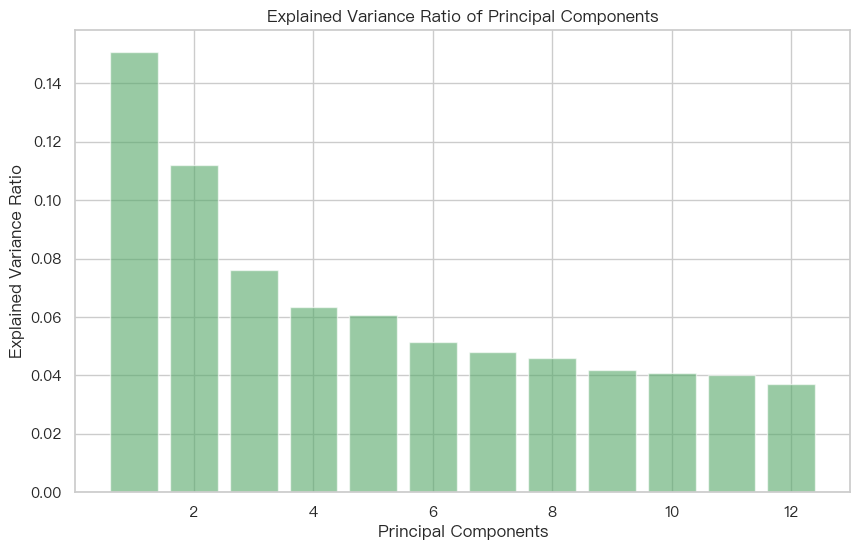

In [63]:
import matplotlib.pyplot as plt

# 可视化解释方差比
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, color='g')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio of Principal Components')
plt.savefig('解释方差比.png', dpi=300, bbox_inches='tight')
plt.show()



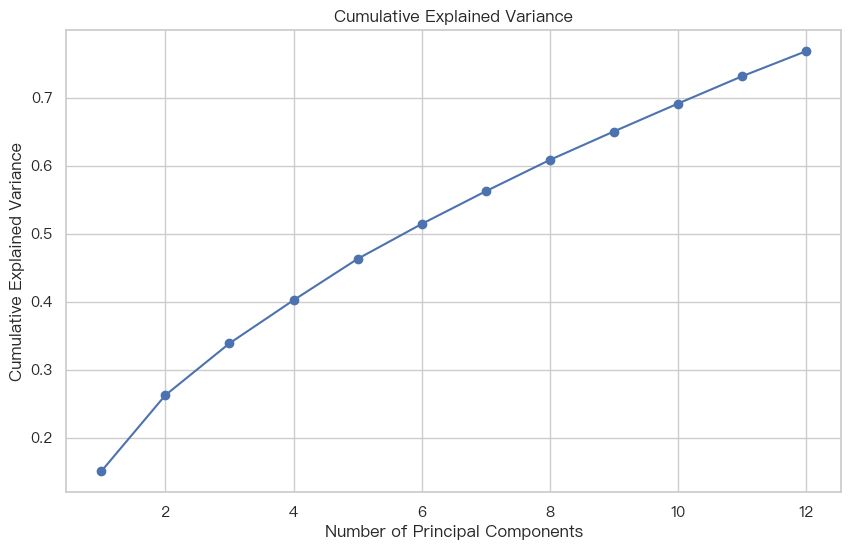

In [64]:

# 可视化累计解释方差比
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.savefig('累计解释方差比.png', dpi=300, bbox_inches='tight')
plt.show()

 查找最优的主成分数并重新进行PCA

In [65]:
# 查找累计解释方差达到80%或90%的主成分数
optimal_components = next(i for i, v in enumerate(cumulative_explained_variance) if v >= 0.8) + 1

# 重新进行PCA
pca_optimal = PCA(n_components=optimal_components)
principal_components_optimal = pca_optimal.fit_transform(data_scaled)

# 解释方差比
explained_variance_ratio_optimal = pca_optimal.explained_variance_ratio_

# 打印解释方差比和累计解释方差
print('Optimal Explained Variance Ratio:', explained_variance_ratio_optimal)
print('Optimal Cumulative Explained Variance:', explained_variance_ratio_optimal.cumsum())



StopIteration: 

创建成对特征图（Pair Plot）

KeyboardInterrupt: 

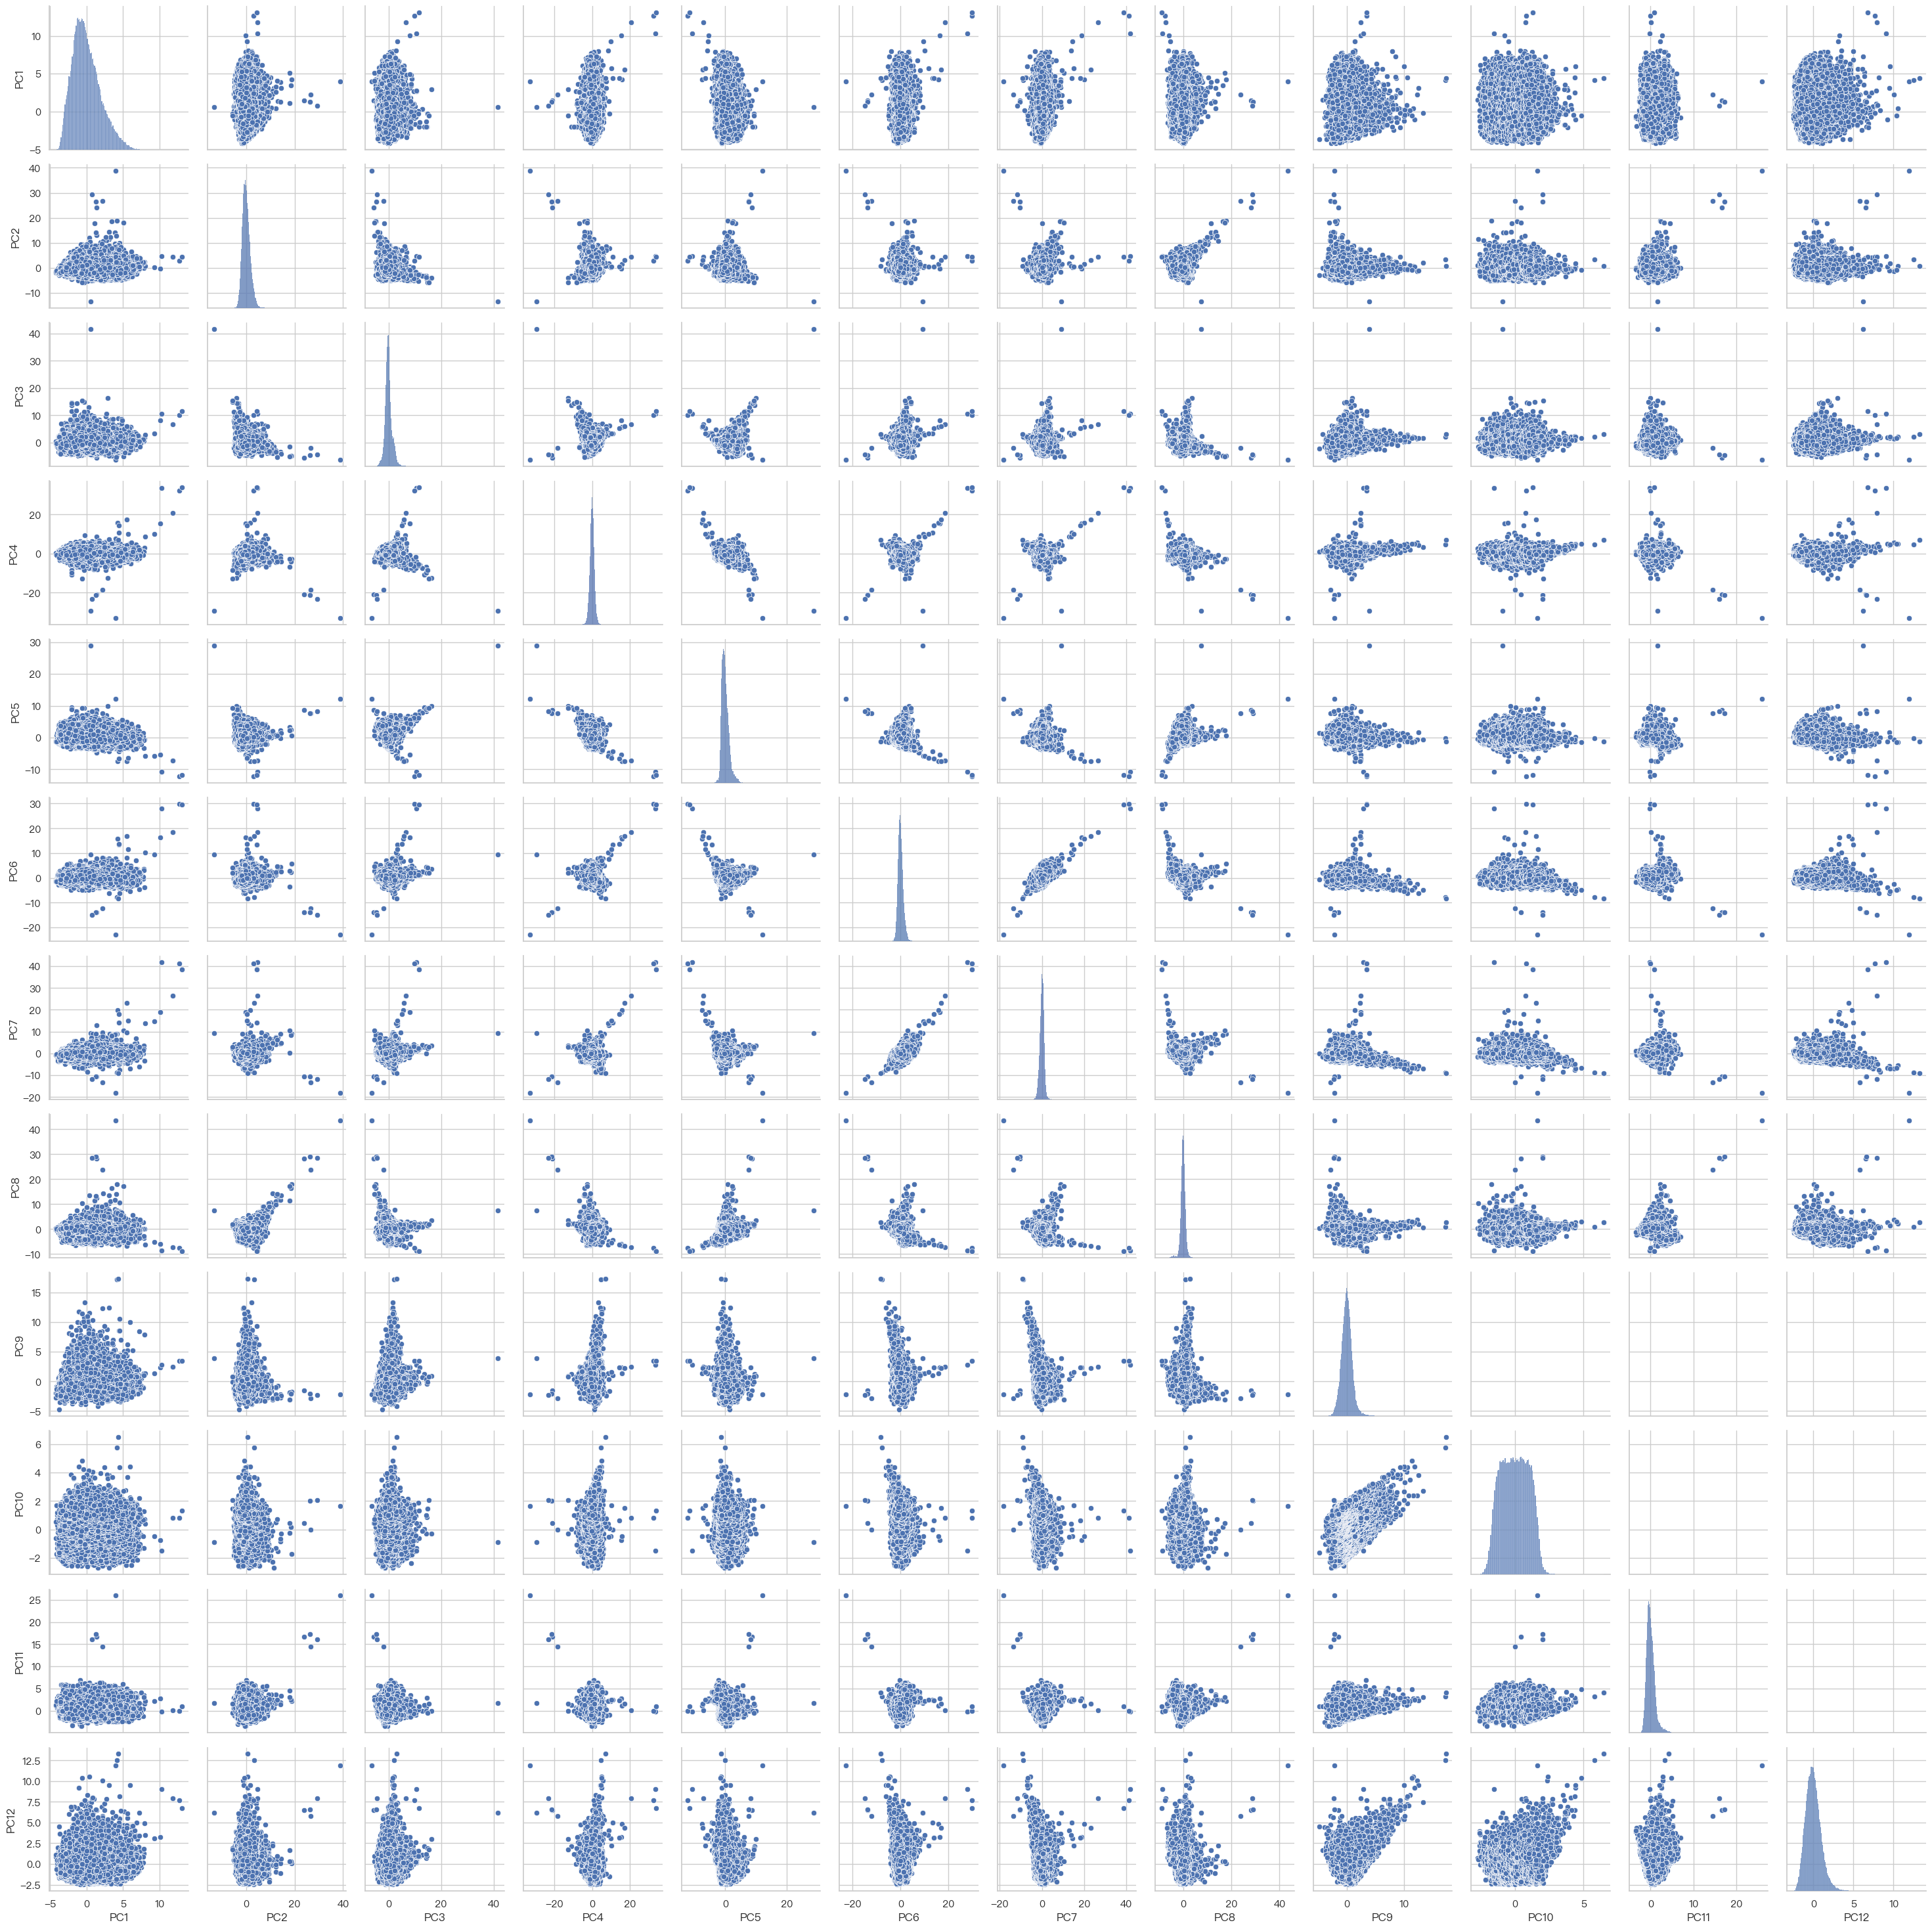

In [59]:
sns.pairplot(pca_df)
plt.suptitle('Pair Plot of Principal Components', y=1.02)
plt.savefig('成对特征图.png', dpi=300, bbox_inches='tight')
plt.show()


可视化降维后的数据

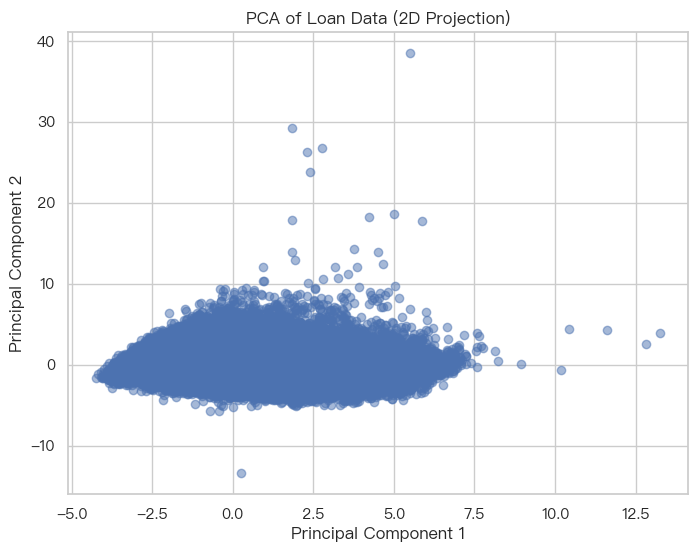

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components_optimal[:, 0], principal_components_optimal[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Loan Data (2D Projection)')
plt.savefig('PCA2D空间投影.png', dpi=300, bbox_inches='tight')
plt.show()


聚类分析后投影到2D或3D空间

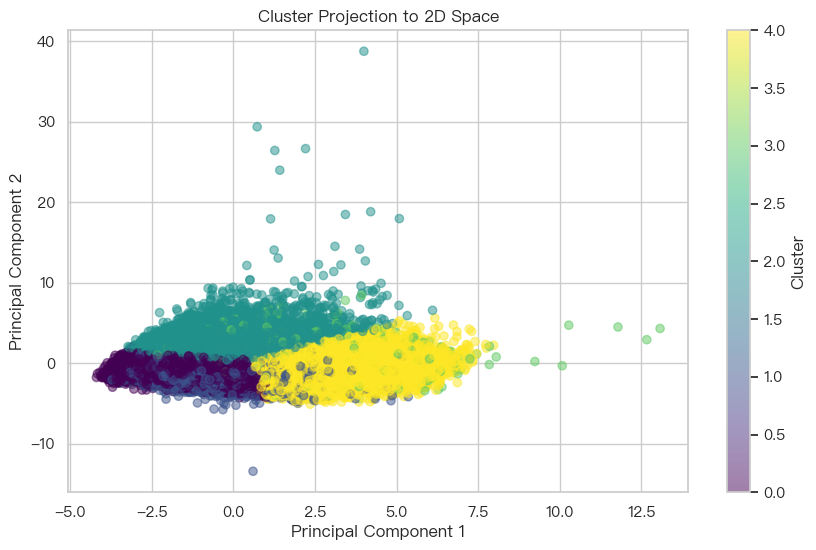

In [67]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# 聚类分析
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# 将聚类结果添加到DataFrame中
pca_df['Cluster'] = clusters

# 投影到2D空间
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Projection to 2D Space')
plt.colorbar(label='Cluster')
plt.savefig('2D空间投影.png', dpi=300, bbox_inches='tight')
plt.show()




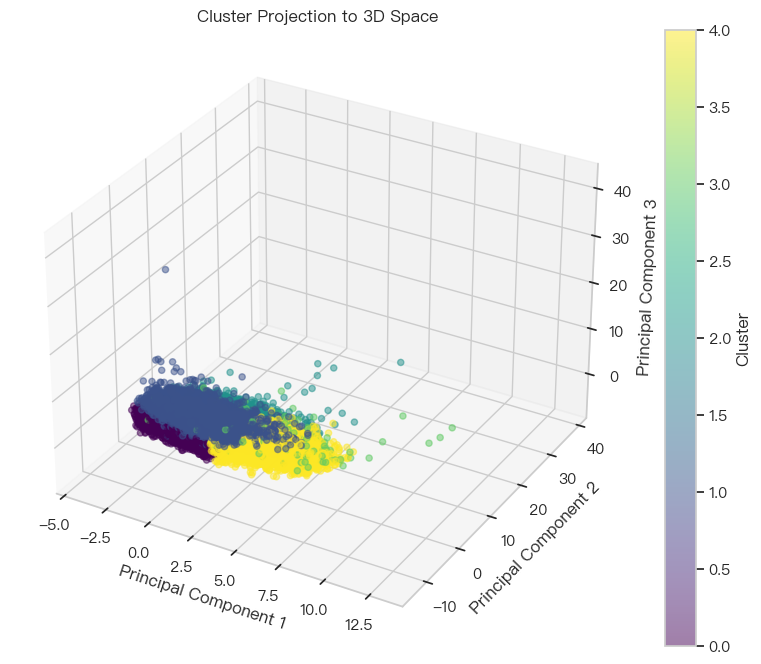

In [68]:
# 投影到3D空间
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=clusters, cmap='viridis', alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Cluster Projection to 3D Space')
plt.colorbar(sc, label='Cluster')
plt.savefig('3D空间投影.png', dpi=300, bbox_inches='tight')
plt.show()

# 关联规则挖掘——从客户多维的贷款属性指标中发现一些有用的关联模式

## 数据预处理

### 数值变量离散化

### 类别变量独热编码

## 关联规则挖掘

### Apriori 算法